# Analysis of correlations of gold, silver and other datasets

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Get gold and silver dfs and several other dfs and set date (or year_month, or quarter) as index
df_au = pd.read_csv("../data/AU.csv", index_col="date", parse_dates=True)
df_ag = pd.read_csv("../data/AG.csv", index_col="date", parse_dates=True)

df_au_fut = pd.read_csv("../data/AU_FUTURES.csv", index_col="date", parse_dates=True)
df_ag_fut = pd.read_csv("../data/AG_FUTURES.csv", index_col="date", parse_dates=True)
df_au_min = pd.read_csv("../data/AU_MINERS_ETF.csv", index_col="date", parse_dates=True)
df_ag_min = pd.read_csv("../data/AG_MINERS_ETF.csv", index_col="date", parse_dates=True)
df_au_res = pd.read_csv("../data/AU_WORLD_RESERVES_OZ_M.csv", index_col="year_month", parse_dates=True)

df_usgdp = pd.read_csv("../data/US_REAL_GDP_Q.csv", index_col="quarter", parse_dates=True)
df_cpi = pd.read_csv("../data/US_CPI_M.csv", index_col="year_month", parse_dates=True)
df_fed = pd.read_csv("../data/FED_FUNDS_EFFECTIVE_RATE_M.csv", index_col="year_month", parse_dates=True)
df_us10y = pd.read_csv("../data/US_10Y_TREASURY_YIELD.csv", index_col="date", parse_dates=True)
df_dxy = pd.read_csv("../data/DXY.csv", index_col="date", parse_dates=True)

df_sp500 = pd.read_csv("../data/SP500.csv", index_col="date", parse_dates=True)
df_vix = pd.read_csv("../data/VIX.csv", index_col="date", parse_dates=True)
df_btc = pd.read_csv("../data/BTC.csv", index_col="date", parse_dates=True)

In [3]:
# Append the CPI estimate for April of 2024 to the CPI df
df_cpi.loc[pd.to_datetime("2024-04")] = {"rate": 3.4}

In [4]:
# Set charts theme
sns.set_theme(style="darkgrid", rc={"grid.alpha": 0.33})
plt.style.use("dark_background")

# Save chart as png function
def save_chart_as_png(filename: str) -> None:
    plt.savefig(
        f"../images/{filename}.png",
        format="png",
        dpi=300,
        orientation="landscape",
        bbox_inches="tight",
    )

## Datasets basic info

*Only the ones that weren't presented yet.*

### Gold futures

In [5]:
# First and last entries
pd.concat([df_au_fut.head(1), df_au_fut.tail(1)]).T

date,2000-08-30,2024-05-17
open,273.899994,2380.699951
high,273.899994,2415.800049
low,273.899994,2380.699951
close,273.899994,2412.199951


In [6]:
df_au_fut.describe().T

,count,mean,std,min,25%,50%,75%,max
open,5951.0,1125.440128,543.385222,255.000000,623.299988,1225.699951,1573.150024,2389.500000
high,5951.0,1131.032970,546.401067,256.100006,624.500000,1231.000000,1580.299988,2429.000000
low,5951.0,1119.572291,540.277166,255.000000,620.250000,1220.099976,1561.900024,2380.699951
close,5951.0,1125.360594,543.358699,255.100006,623.100006,1225.300049,1571.950012,2412.199951


### Silver futures

In [7]:
# First and last entries
pd.concat([df_ag_fut.head(1), df_ag_fut.tail(1)]).T

date,2000-08-30,2024-05-17
open,4.950,29.760000
high,4.950,31.605000
low,4.895,29.760000
close,4.930,31.047001


In [8]:
df_ag_fut.describe().T

,count,mean,std,min,25%,50%,75%,max
open,5952.0,16.703762,8.330624,4.026,11.04425,16.590000,22.087499,48.459999
high,5952.0,16.816165,8.420389,4.026,11.21925,16.684999,22.250000,49.520000
low,5952.0,16.579884,8.231053,4.026,10.96625,16.509000,21.954000,47.540001
close,5952.0,16.697657,8.324800,4.026,11.07875,16.586500,22.078499,48.584000


### Gold miners ETF

In [9]:
# First and last entries
pd.concat([df_au_min.head(1), df_au_min.tail(1)]).T

date,2006-05-22,2024-05-17
open,36.520000,36.209999
high,37.290001,36.889999
low,35.869999,36.000000
close,37.230000,36.869999


In [10]:
df_au_min.describe().T

,count,mean,std,min,25%,50%,75%,max
open,4529.0,33.676624,11.939670,12.70,23.570000,31.290001,41.639999,66.639999
high,4529.0,34.112837,12.056085,12.92,23.879999,31.750000,42.099998,66.980003
low,4529.0,33.173268,11.768479,12.40,23.250000,30.820000,41.000000,66.000000
close,4529.0,33.639795,11.921442,12.47,23.570000,31.250000,41.580002,66.629997


### Silver miners ETF

In [11]:
# First and last entries
pd.concat([df_ag_min.head(1), df_ag_min.tail(1)]).T

date,2010-04-20,2024-05-17
open,44.400002,34.500000
high,44.910000,35.299999
low,44.160000,34.189999
close,44.220001,35.230000


In [12]:
df_ag_min.describe().T

,count,mean,std,min,25%,50%,75%,max
open,3545.0,39.465642,15.852764,15.43,27.719999,34.619999,44.830002,93.330002
high,3545.0,39.975134,16.034987,15.57,28.190001,35.160000,45.410000,94.019997
low,3545.0,38.862635,15.572402,14.94,27.430000,34.119999,44.000000,92.070000
close,3545.0,39.408779,15.813913,15.41,27.730000,34.700001,44.549999,92.610001


### Gold world reserves in central banks in troy ounces

In [13]:
# First and last entries
pd.concat([df_au_res.head(1), df_au_res.tail(1)]).T

year_month,1957-01-01,2024-03-01
amount,1.031311e+09,1.059191e+09


In [14]:
df_au_res.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,807.0,9.866672e+08,8.077267e+07,8.560708e+08,9.296062e+08,9.574915e+08,1.036136e+09,1.193586e+09


### US real GDP 2017 prices

In [15]:
# First and last entries
pd.concat([df_usgdp.head(1), df_usgdp.tail(1)]).T

quarter,1947-01-01,2024-01-01
value,2182.681,22768.866


In [16]:
df_usgdp.describe().T

,count,mean,std,min,25%,50%,75%,max
value,309.0,10009.652777,6084.859915,2172.432,4748.046,8604.22,15670.88,22768.866


### US 10 year treasury bonds yield

In [17]:
# First and last entries
pd.concat([df_us10y.head(1), df_us10y.tail(1)]).T

date,1962-01-02,2024-05-16
yield,4.06,4.38


In [18]:
df_us10y.describe().T

,count,mean,std,min,25%,50%,75%,max
yield,15580.0,5.861234,2.967745,0.52,3.86,5.59,7.61,15.84


### Dollar index (DXY)

In [19]:
# First and last entries
pd.concat([df_dxy.head(1), df_dxy.tail(1)]).T

date,1971-01-04,2024-05-17
open,120.529999,104.500000
high,120.529999,104.800003
low,120.529999,104.389999
close,120.529999,104.449997


In [20]:
df_dxy.describe().T

,count,mean,std,min,25%,50%,75%,max
open,13559.0,97.254413,14.269822,71.330002,87.610001,95.459999,103.809998,164.720001
high,13559.0,97.493565,14.210228,71.690002,87.809998,95.680000,103.980003,164.720001
low,13559.0,97.020181,14.322411,70.699997,87.379997,95.199997,103.645001,164.720001
close,13559.0,97.253007,14.266384,71.330002,87.584999,95.459999,103.805001,164.720001


### S&P 500 index

In [21]:
# First and last entries
pd.concat([df_sp500.head(1), df_sp500.tail(1)]).T

date,1927-12-30,2024-05-17
open,17.66,5303.100098
high,17.66,5305.450195
low,17.66,5283.589844
close,17.66,5303.270020


In [22]:
df_sp500.describe().T

,count,mean,std,min,25%,50%,75%,max
open,24211.0,606.163492,1022.317462,0.0,9.670000,42.360001,1014.035004,5310.069824
high,24211.0,629.692064,1016.841011,4.4,24.620001,102.820000,1022.370026,5325.490234
low,24211.0,622.120747,1005.290512,4.4,24.620001,101.250000,1004.600006,5296.189941
close,24211.0,626.149632,1011.444326,4.4,24.620001,102.089996,1015.454987,5308.149902


*The "open" metric is unreliable, often showing as 0, which is incorrect. Therefore, we'll use the HLC mean instead of the OHLC mean.*

### Volatility index (VIX)

In [23]:
# First and last entries
pd.concat([df_vix.head(1), df_vix.tail(1)]).T

date,1990-01-02,2024-05-17
open,17.24,12.28
high,17.24,12.48
low,17.24,11.91
close,17.24,11.99


In [24]:
df_vix.describe().T

,count,mean,std,min,25%,50%,75%,max
open,8671.0,19.609218,7.956103,9.01,13.92,17.72,23.04,82.69
high,8671.0,20.414379,8.415585,9.31,14.49,18.38,23.90,89.53
low,8671.0,18.860085,7.448745,8.56,13.39,17.11,22.26,72.76
close,8671.0,19.522255,7.884314,9.14,13.84,17.67,22.90,82.69


### Bitcoin price (BTC)

In [25]:
# First and last entries
pd.concat([df_btc.head(1), df_btc.tail(1)]).T

date,2010-07-17,2024-05-17
open,0.05,65298.85
high,0.05,67399.94
low,0.05,65156.23
close,0.05,67004.04


In [26]:
df_btc.describe().T

,count,mean,std,min,25%,50%,75%,max
open,5054.0,11381.897363,16757.374969,0.05,229.28450,2484.695,16701.216434,72961.03
high,5054.0,11647.834480,17150.059829,0.05,232.58375,2564.545,16949.921155,73628.43
low,5054.0,11102.754211,16339.522616,0.05,225.85800,2380.720,16445.808350,71333.36
close,5054.0,11396.234535,16777.675269,0.05,229.28150,2493.140,16709.971266,73087.95


## Preparing all data into a combined df

In [27]:
# Get OHLC average as price from dfs
for df in df_au_fut, df_ag_fut, df_au_min, df_ag_min, df_dxy, df_vix, df_btc:
    df["price"] = df[["open", "high", "low", "close"]].mean(axis=1)
    df.drop(columns=["open", "high", "low", "close"], inplace=True)

# Get HLC average as price from S&P 500 df (due to zero values in the open col)
df_sp500["price"] = df_sp500[["high", "low", "close"]].mean(axis=1)
df_sp500.drop(columns=["open", "high", "low", "close"], inplace=True)

In [28]:
# Resample date of non-daily dfs 
df_au_res, df_usgdp, df_cpi, df_fed = [df.resample("D").ffill() for df in [df_au_res, df_usgdp, df_cpi, df_fed]]

In [29]:
# Get 1-year volatility of gold and silver with the exponentially weighted moving average method
for df, name in [(df_au, "au"), (df_ag, "ag")]:
    df["log_returns"] = np.log(df["price"] / df["price"].shift(1))
    df[f"{name}_volatility"] = df["log_returns"].ewm(span=252).std()
    df.loc[:df.index[251], f"{name}_volatility"] = np.nan
    df.drop(columns=["log_returns"], inplace=True)

In [30]:
# Rename dfs cols
df_au.rename(columns={"price": "au"}, inplace=True)
df_ag.rename(columns={"price": "ag"}, inplace=True)
df_au_fut.rename(columns={"price": "au_futures"}, inplace=True)
df_ag_fut.rename(columns={"price": "ag_futures"}, inplace=True)
df_au_min.rename(columns={"price": "au_minners"}, inplace=True)
df_ag_min.rename(columns={"price": "ag_minners"}, inplace=True)
df_au_res.rename(columns={"amount": "au_reserves"}, inplace=True)
df_usgdp.rename(columns={"value": "us_real_gdp"}, inplace=True)
df_cpi.rename(columns={"rate": "us_cpi"}, inplace=True)
df_fed.rename(columns={"rate": "fed_rate"}, inplace=True)
df_us10y.rename(columns={"yield": "us_10y_yield"}, inplace=True)
df_dxy.rename(columns={"price": "dxy"}, inplace=True)
df_sp500.rename(columns={"price": "sp500"}, inplace=True)
df_vix.rename(columns={"price": "vix"}, inplace=True)
df_btc.rename(columns={"price": "btc"}, inplace=True)

In [31]:
# Combine all in one df (null values do not need to be dropped because they are ignored in the calculations, this way no dataset will be shortened)
df_all = pd.concat([df_au, df_ag, df_au_fut, df_ag_fut, df_au_min, df_ag_min, df_au_res, df_usgdp, df_cpi, df_fed, df_us10y, df_dxy, df_sp500, df_vix, df_btc], axis=1)

## Covariance matrix

In [32]:
# Get covariance matrix
df_cov_matrix = df_all.cov()
df_cov_matrix

,au,au_volatility,ag,ag_volatility,au_futures,ag_futures,au_minners,ag_minners,au_reserves,us_real_gdp,us_cpi,fed_rate,us_10y_yield,dxy,sp500,vix,btc
au,3.086192e+05,-0.197918,4.127934e+03,0.411861,2.948004e+05,3.919660e+03,1.840947e+02,7.587368e+02,-3.032306e+09,2.429833e+06,-4.457365e+02,-1.192448e+03,-1.105188e+03,-2.499231e+03,5.502490e+05,-2.854288e+01,3.467578e+06
au_volatility,-1.979178e-01,0.000028,6.627258e-03,0.000043,-1.173964e-01,2.284308e-03,1.714493e-02,2.009377e-02,-2.220059e+04,-7.515157e+00,8.301881e-03,9.322874e-03,6.475703e-03,5.054363e-03,-1.618249e+00,1.130599e-02,-7.032786e+00
ag,4.127934e+03,0.006627,6.772148e+01,0.026787,3.912352e+03,6.883905e+01,4.217474e+01,8.343351e+01,-9.432154e+07,2.933139e+04,-2.679469e+00,-1.309230e+01,-1.249447e+01,-4.308026e+01,6.140313e+03,-1.430849e+00,1.257176e+04
ag_volatility,4.118608e-01,0.000043,2.678663e-02,0.000111,9.709435e-01,2.748330e-02,5.189152e-02,7.473768e-02,-1.006270e+05,-9.637704e+00,1.206498e-02,1.527225e-02,1.189729e-02,4.704730e-03,-2.186660e+00,1.200215e-02,-6.294003e+00
au_futures,2.948004e+05,-0.117396,3.912352e+03,0.970944,2.952029e+05,3.925928e+03,1.905533e+02,7.510592e+02,1.776146e+10,1.074107e+06,1.845359e+02,-3.211459e+02,-4.663668e+02,-7.234781e+02,4.636135e+05,-2.813315e+02,3.497666e+06
ag_futures,3.919660e+03,0.002284,6.883905e+01,0.027483,3.925928e+03,6.930794e+01,4.273728e+01,8.424268e+01,9.129170e+07,1.096218e+04,2.082029e+00,-5.844044e+00,-6.175866e+00,-3.857552e+01,3.949491e+03,-6.920434e+00,1.291904e+04
au_minners,1.840947e+02,0.017145,4.217474e+01,0.051892,1.905533e+02,4.273728e+01,1.420178e+02,1.743994e+02,-4.113131e+08,-1.167419e+04,2.943088e+00,-8.437126e-01,2.235272e+00,-7.505277e+01,-5.297869e+03,2.018235e+01,-4.550822e+03
ag_minners,7.587368e+02,0.020094,8.343351e+01,0.074738,7.510592e+02,8.424268e+01,1.743994e+02,2.500765e+02,-5.706479e+08,-1.730016e+04,-1.228353e+00,-1.091373e+01,-2.251836e+00,-1.130542e+02,-9.332449e+03,1.159744e+01,-6.748556e+04
au_reserves,-3.032306e+09,-22200.589667,-9.432154e+07,-100626.981572,1.776146e+10,9.129170e+07,-4.113131e+08,-5.706479e+08,6.518305e+15,-2.552744e+11,7.614083e+06,7.939999e+06,-1.282716e+07,3.049526e+08,-1.523778e+10,-1.712944e+07,6.119635e+11
us_real_gdp,2.429833e+06,-7.515157,2.933139e+04,-9.637704,1.074107e+06,1.096218e+04,-1.167419e+04,-1.730016e+04,-2.552744e+11,3.650345e+07,-3.605607e+03,-8.943042e+03,-1.032619e+04,-2.675031e+04,5.535638e+06,5.783939e+02,1.943894e+07


**Not very insightful. We must check correlations.**

## Correlation matrix (Pearson method)

In [33]:
# Get correlation matrix
df_corr_matrix = df_all.corr().round(3)
df_corr_matrix

,au,au_volatility,ag,ag_volatility,au_futures,ag_futures,au_minners,ag_minners,au_reserves,us_real_gdp,us_cpi,fed_rate,us_10y_yield,dxy,sp500,vix,btc
au,1.000,-0.068,0.903,0.070,1.000,0.869,0.040,0.167,-0.091,0.859,-0.281,-0.562,-0.647,-0.318,0.865,-0.006,0.721
au_volatility,-0.068,1.000,0.153,0.775,-0.071,0.090,0.430,0.598,-0.072,-0.276,0.541,0.455,0.397,0.068,-0.267,0.448,-0.200
ag,0.903,0.153,1.000,0.308,0.869,1.000,0.553,0.854,-0.190,0.690,-0.113,-0.414,-0.494,-0.369,0.651,-0.021,0.121
ag_volatility,0.070,0.775,0.308,1.000,0.266,0.493,0.659,0.748,-0.163,-0.176,0.392,0.372,0.363,0.031,-0.180,0.246,-0.059
au_futures,1.000,-0.071,0.869,0.266,1.000,0.868,0.041,0.165,0.562,0.856,0.189,-0.322,-0.698,-0.119,0.754,-0.060,0.723
ag_futures,0.869,0.090,1.000,0.493,0.868,1.000,0.556,0.854,0.186,0.558,0.138,-0.378,-0.603,-0.413,0.419,-0.096,0.123
au_minners,0.040,0.430,0.553,0.659,0.041,0.556,1.000,0.894,-0.526,-0.502,0.121,-0.039,0.176,-0.654,-0.385,0.188,-0.022
ag_minners,0.167,0.598,0.854,0.748,0.165,0.854,0.894,1.000,-0.659,-0.632,-0.038,-0.455,-0.164,-0.780,-0.526,0.103,-0.252
au_reserves,-0.091,-0.072,-0.190,-0.163,0.562,0.186,-0.526,-0.659,1.000,-0.552,0.034,0.027,-0.054,0.414,-0.174,-0.042,0.740
us_real_gdp,0.859,-0.276,0.690,-0.176,0.856,0.558,-0.502,-0.632,-0.552,1.000,-0.225,-0.428,-0.631,-0.372,0.885,0.020,0.762


### Heatmap

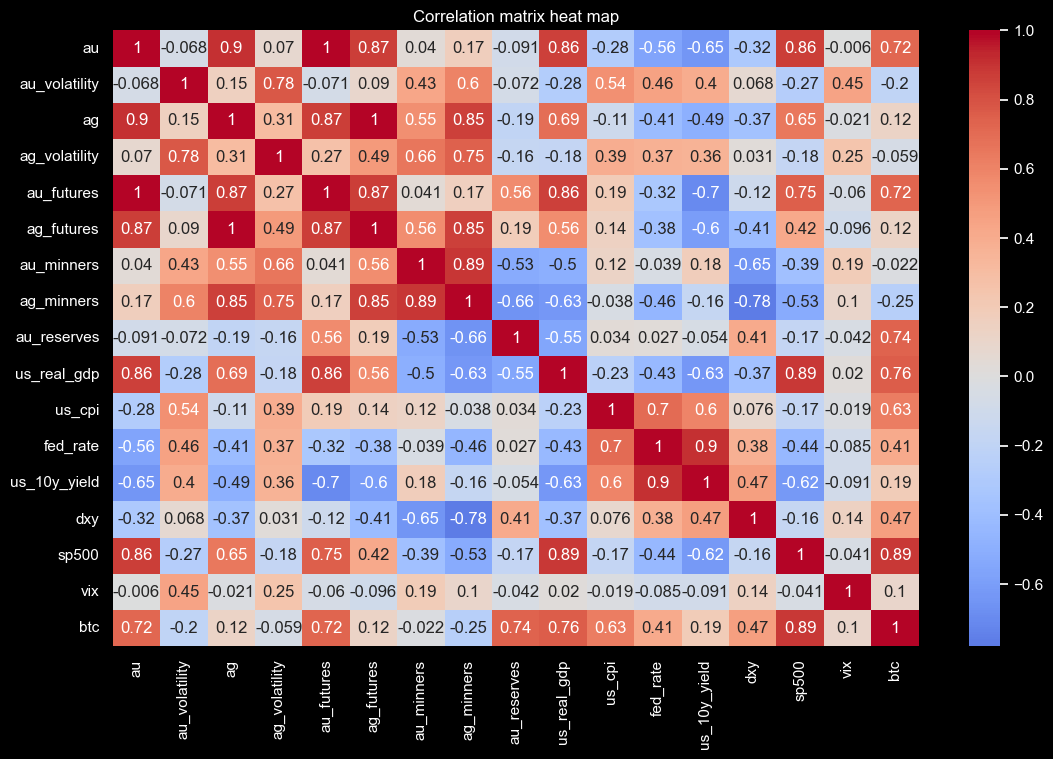

In [34]:
plt.figure(figsize=(13, 8))

sns.heatmap(data=df_corr_matrix, annot=True, cmap="coolwarm", center=0)

plt.title("Correlation matrix heat map")

save_chart_as_png("4_AU_AG_correlations_matrix")

**Key takeaways:**
- The spot and futures markets have a perfect correlation, as anticipated.
- Gold and silver show a strong correlation, including their respective yearly volatilities.
- Gold is strongly correlated with the S&P 500 and US real GDP, while silver has a moderate correlation with these indicators.
- Gold has a strong correlation with Bitcoin, whereas silver shows no correlation.
- Gold exhibits a moderate negative correlation with the Fed funds rate and the US 10-year Treasury yield, with silver showing a slightly weaker negative correlation.
- Both metals have a weak to moderate negative correlation with the dollar index.
- Gold shows no correlation with mining stocks, in contrast to silver, which has a strong correlation, particularly with its miners.
- There is no correlation between central banks' gold reserves and the precious metals.
- Both metals have little to no correlation with US inflation and the volatility index; however, the metals' volatilities, especially gold's, are moderately correlated with these indicators.

### Top ten correlations

**Gold price**

In [35]:
# Top 10 (abs) corr with gold price
df_sorted_corr = df_corr_matrix.sort_values(by="au", key=lambda x: x.abs(), ascending=False)
df_sorted_corr.drop("au", inplace=True)
df_sorted_corr = df_sorted_corr.iloc[:10][["au"]]
df_sorted_corr.T

,au_futures,ag,ag_futures,sp500,us_real_gdp,btc,us_10y_yield,fed_rate,dxy,us_cpi
au,1.0,0.903,0.869,0.865,0.859,0.721,-0.647,-0.562,-0.318,-0.281


In [36]:
# Get type of correlation and absolute values for chart
df_sorted_corr["type"] = df_sorted_corr["au"].apply(lambda x: "Negative" if x < 0 else "Positive")
df_sorted_corr["au"] = df_sorted_corr["au"].abs()

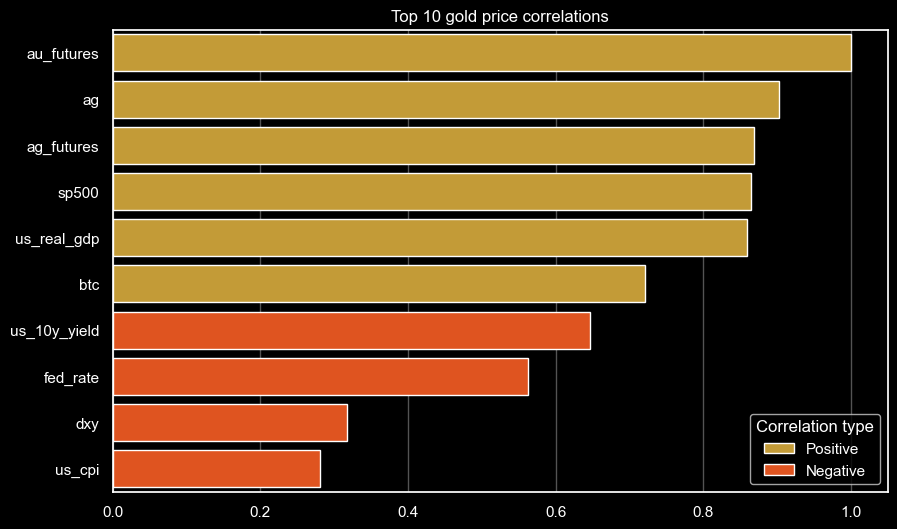

In [37]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_sorted_corr, x="au", y=df_sorted_corr.index, hue="type", palette={"Positive": "goldenrod", "Negative": "orangered"})

plt.title("Top 10 gold price correlations")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Correlation type")

**Gold 1-year volatility**

In [38]:
# Top 10 (abs) corr with gold 1-year volatility
df_sorted_corr = df_corr_matrix.sort_values(by="au_volatility", key=lambda x: x.abs(), ascending=False)
df_sorted_corr.drop("au_volatility", inplace=True)
df_sorted_corr = df_sorted_corr.iloc[:10][["au_volatility"]]
df_sorted_corr.T

,ag_volatility,ag_minners,us_cpi,fed_rate,vix,au_minners,us_10y_yield,us_real_gdp,sp500,btc
au_volatility,0.775,0.598,0.541,0.455,0.448,0.43,0.397,-0.276,-0.267,-0.2


In [39]:
# Get type of correlation and absolute values for chart
df_sorted_corr["type"] = df_sorted_corr["au_volatility"].apply(lambda x: "Negative" if x < 0 else "Positive")
df_sorted_corr["au_volatility"] = df_sorted_corr["au_volatility"].abs()

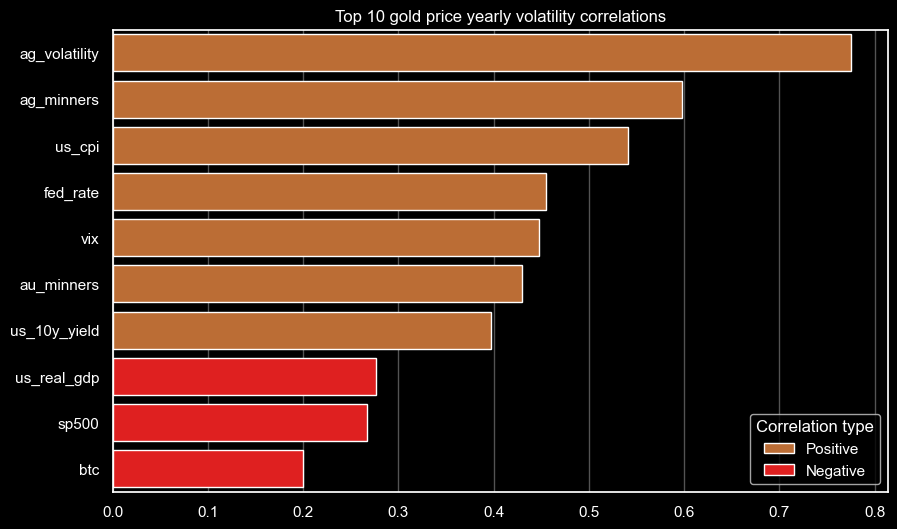

In [40]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_sorted_corr, x="au_volatility", y=df_sorted_corr.index, hue="type", palette={"Positive": "chocolate", "Negative": "red"})

plt.title("Top 10 gold price yearly volatility correlations")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Correlation type")

**Silver price**

In [41]:
# Top 10 (abs) corr with silver price
df_sorted_corr = df_corr_matrix.sort_values(by="ag", key=lambda x: x.abs(), ascending=False)
df_sorted_corr.drop("ag", inplace=True)
df_sorted_corr = df_sorted_corr.iloc[:10][["ag"]]
df_sorted_corr.T

,ag_futures,au,au_futures,ag_minners,us_real_gdp,sp500,au_minners,us_10y_yield,fed_rate,dxy
ag,1.0,0.903,0.869,0.854,0.69,0.651,0.553,-0.494,-0.414,-0.369


In [42]:
# Get type of correlation and absolute values for chart
df_sorted_corr["type"] = df_sorted_corr["ag"].apply(lambda x: "Negative" if x < 0 else "Positive")
df_sorted_corr["ag"] = df_sorted_corr["ag"].abs()

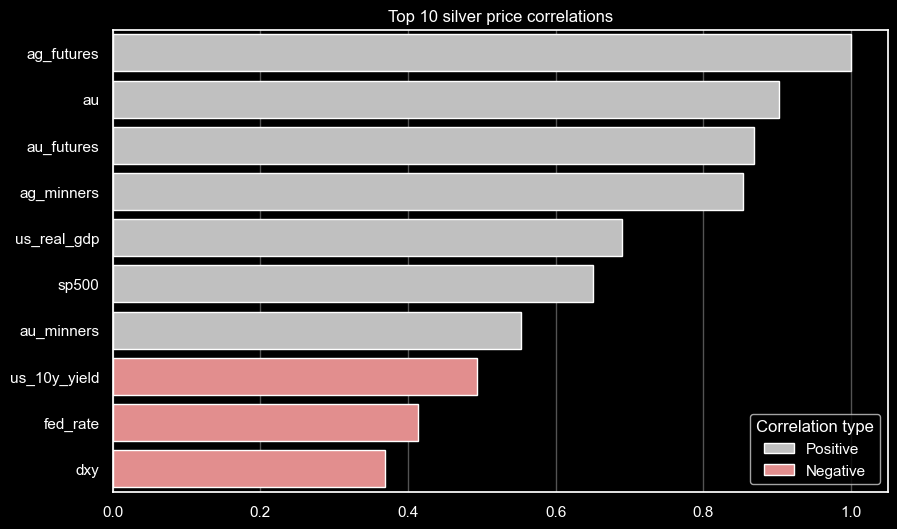

In [43]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_sorted_corr, x="ag", y=df_sorted_corr.index, hue="type", palette={"Positive": "silver", "Negative": "lightcoral"})

plt.title("Top 10 silver price correlations")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Correlation type")

**Silver 1-year volatility**

In [44]:
# Top 10 (abs) corr with silver 1-year volatility
df_sorted_corr = df_corr_matrix.sort_values(by="ag_volatility", key=lambda x: x.abs(), ascending=False)
df_sorted_corr.drop("ag_volatility", inplace=True)
df_sorted_corr = df_sorted_corr.iloc[:10][["ag_volatility"]]
df_sorted_corr.T

,au_volatility,ag_minners,au_minners,ag_futures,us_cpi,fed_rate,us_10y_yield,ag,au_futures,vix
ag_volatility,0.775,0.748,0.659,0.493,0.392,0.372,0.363,0.308,0.266,0.246


In [45]:
# Get type of correlation and absolute values for chart
df_sorted_corr["type"] = df_sorted_corr["ag_volatility"].apply(lambda x: "Negative" if x < 0 else "Positive")
df_sorted_corr["ag_volatility"] = df_sorted_corr["ag_volatility"].abs()

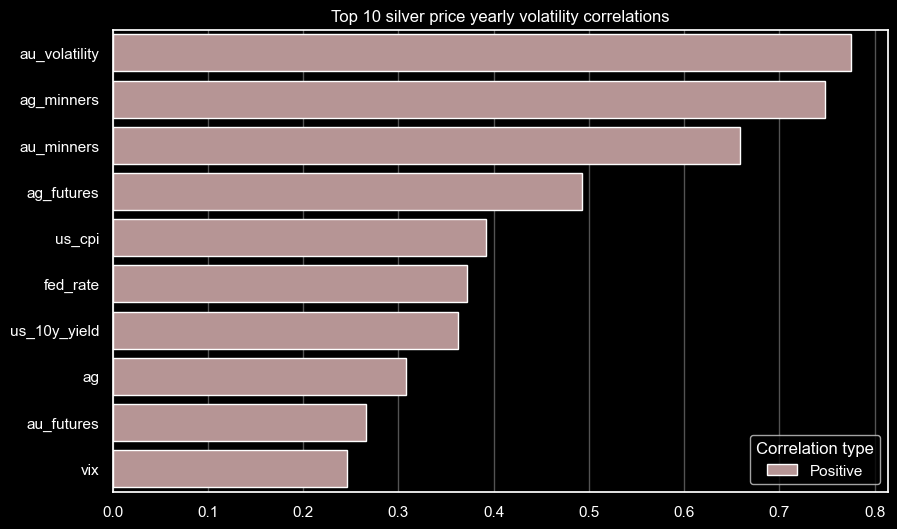

In [46]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_sorted_corr, x="ag_volatility", y=df_sorted_corr.index, hue="type", palette={"Positive": "rosybrown", "Negative": "red"})

plt.title("Top 10 silver price yearly volatility correlations")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Correlation type")